#### Student Depression Variable Imputation

**Name:** Brayan Olivares


#### Import Libraries

In [6]:
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Para imputación de valores faltantes
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Para preprocesamiento
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Configuración de visualizaciones
%matplotlib inline
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

#### Read Dataset

In [7]:
# Leer el archivo CSV
df = pd.read_csv('Synthetic_Data_Cleaning_example.csv')

# Mostrar las primeras filas para inspección inicial
display(df.head())

# Información básica del dataset
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))

,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         103 non-null    float64
 1   Income      103 non-null    float64
 2   Gender      84 non-null     object 
 3   Registered  103 non-null    float64
 4   City        103 non-null    object 
dtypes: float64(3), object(2)
memory usage: 4.2+ KB
None

Estadísticas descriptivas:


,Age,Income,Gender,Registered,City
count,103.000000,103.000000,84,103.000000,103
unique,NaN,NaN,8,NaN,4
top,NaN,NaN,Male,NaN,New York
freq,NaN,NaN,12,NaN,27
mean,29.573987,51079.867179,NaN,0.504854,NaN
std,13.137300,21167.304578,NaN,0.502421,NaN
min,-5.000000,-1000.000000,NaN,0.000000,NaN
25%,23.988273,37726.305475,NaN,0.000000,NaN
50%,28.843517,51028.444622,NaN,1.000000,NaN
75%,34.967142,58315.989946,NaN,1.000000,NaN


#### Exploratory Data Analysis

Valores faltantes por columna:


Gender        20
Age            1
Income         1
Registered     1
City           1
dtype: int64

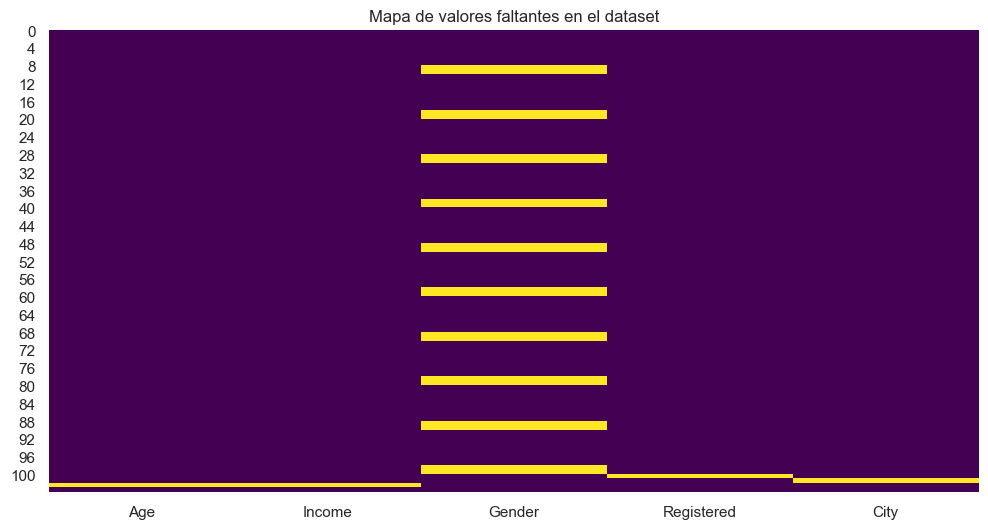

In [8]:
# 1. Análisis de valores faltantes
print("Valores faltantes por columna:")
missing_data = df.isnull().sum().sort_values(ascending=False)
display(missing_data[missing_data > 0])

# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de valores faltantes en el dataset")
plt.show()

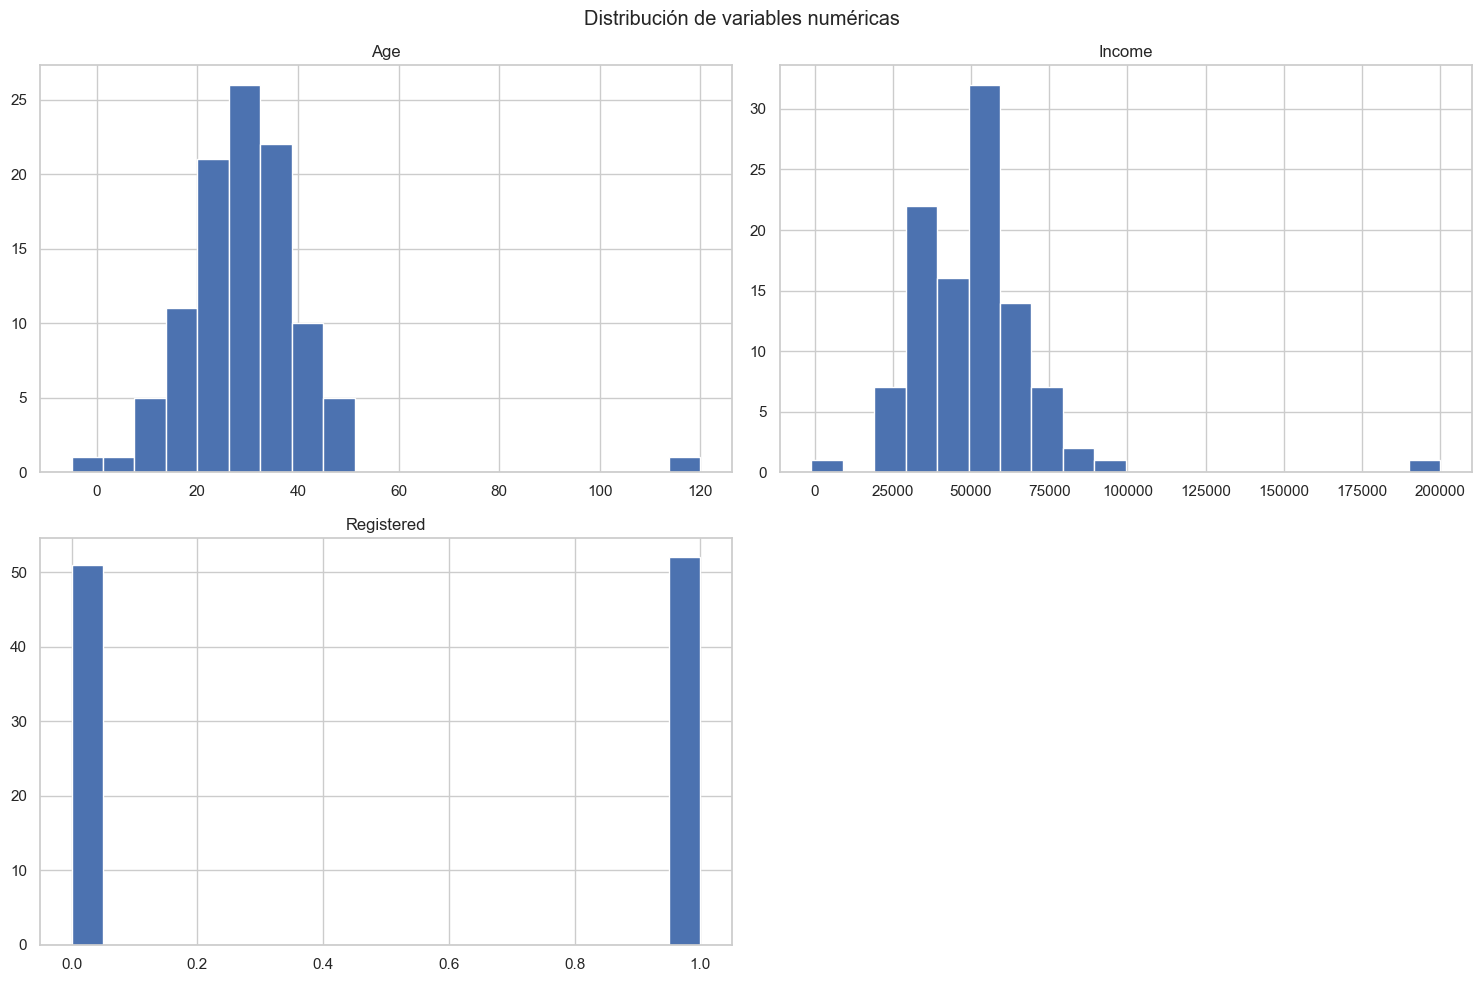

In [9]:
# 2. Análisis de distribuciones
# Selecciona columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Histogramas para variables numéricas
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribución de variables numéricas")
plt.tight_layout()
plt.show()


Análisis de variables categóricas:

Frecuencia en Gender:


Gender
Male      0.142857
Female    0.130952
MALE      0.130952
FEMALE    0.119048
male      0.119048
female    0.119048
femle     0.119048
Femael    0.119048
Name: proportion, dtype: float64

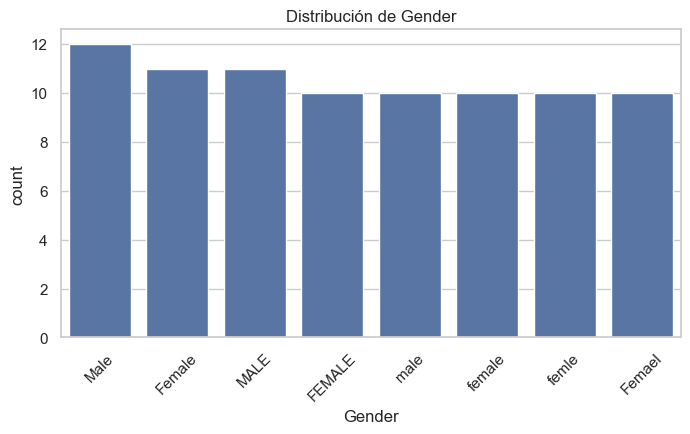


Frecuencia en City:


City
New York    0.262136
Berlin      0.252427
Paris       0.242718
Tokyo       0.242718
Name: proportion, dtype: float64

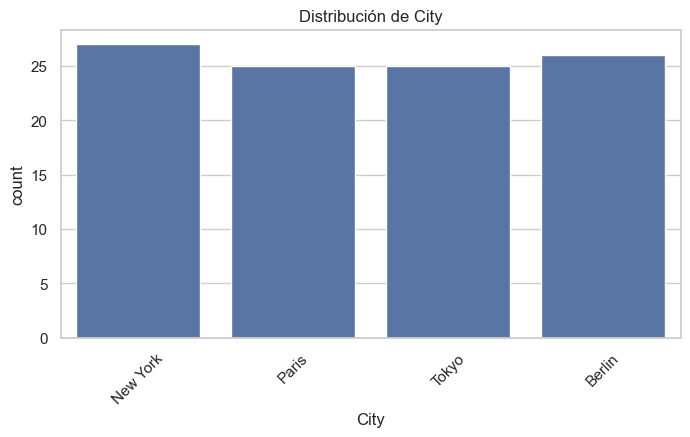

In [10]:
# 3. Análisis de variables categóricas (si existen)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    print("\nAnálisis de variables categóricas:")
    for col in categorical_cols:
        print(f"\nFrecuencia en {col}:")
        display(df[col].value_counts(normalize=True))
        
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col)
        plt.title(f"Distribución de {col}")
        plt.xticks(rotation=45)
        plt.show()

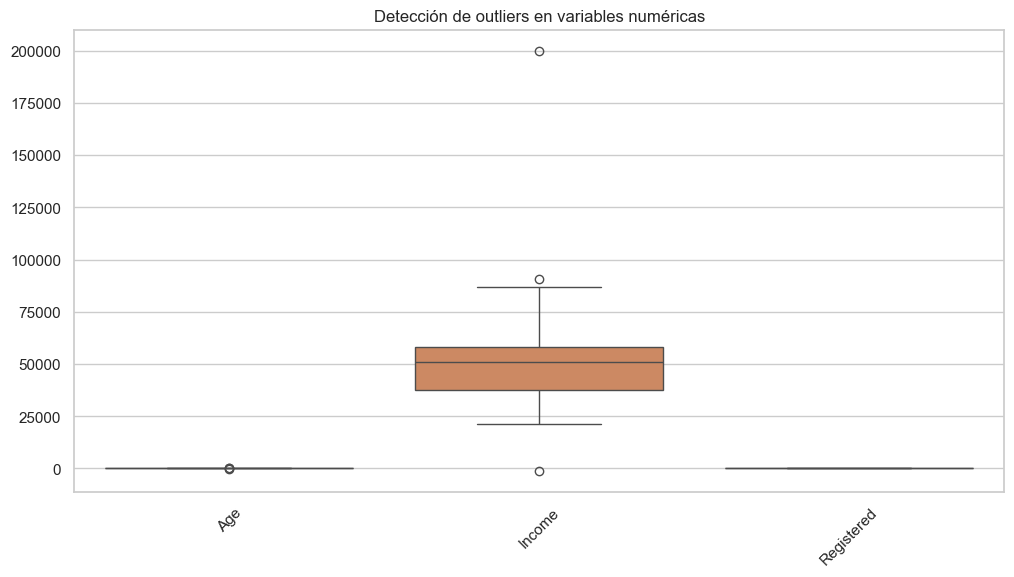

In [11]:
# 4. Detección de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Detección de outliers en variables numéricas")
plt.xticks(rotation=45)
plt.show()

#### Data Cleaning

In [12]:
# 1. Copia del dataframe original para seguridad
df_clean = df.copy()


In [13]:
# 2. Verificar duplicados
print(f"Total de filas duplicadas: {df_clean.duplicated().sum()}")

Total de filas duplicadas: 1


In [14]:
# 3. Eliminar duplicados
df_clean = df_clean.drop_duplicates()

In [15]:
# 4. Revisar tipos de datos
print("Tipos de datos actuales:")
display(df_clean.dtypes)

Tipos de datos actuales:


Age           float64
Income        float64
Gender         object
Registered    float64
City           object
dtype: object

In [16]:
# 5. Reporte de valores faltantes inicial
print("Valores faltantes iniciales:\n", df_clean.isnull().sum())


Valores faltantes iniciales:
 Age            1
Income         1
Gender        20
Registered     1
City           1
dtype: int64


In [17]:
# 6. Imputar 'Age' (media) - Nota: .ravel() convierte a 1D
imputer_age = SimpleImputer(strategy='mean')
df_clean['Age'] = imputer_age.fit_transform(df_clean[['Age']]).ravel()

In [18]:
# 7. Imputar 'Income' (mediana)
imputer_income = SimpleImputer(strategy='median')
df_clean['Income'] = imputer_income.fit_transform(df_clean[['Income']]).ravel()

In [19]:
# 8. Imputar 'Gender' (moda) - ¡Corrección clave!
imputer_gender = SimpleImputer(strategy='most_frequent')
df_clean['Gender'] = imputer_gender.fit_transform(df_clean[['Gender']]).ravel()

In [20]:
# 9. Imputar 'Registered' (moda)
imputer_reg = SimpleImputer(strategy='most_frequent')
df_clean['Registered'] = imputer_reg.fit_transform(df_clean[['Registered']]).ravel()

In [21]:
# 10. Imputar 'City' (valor personalizado)
df_clean['City'] = df_clean['City'].fillna('Desconocido')

In [22]:
# 11. Verificar resultados
print("\nValores faltantes después de imputar:\n", df_clean.isnull().sum())


Valores faltantes después de imputar:
 Age           0
Income        0
Gender        0
Registered    0
City          0
dtype: int64


In [23]:
# 12. Estadísticas post-imputación
print("\nResumen de imputación:")
print(f"- Media de Age: {imputer_age.statistics_[0]:.2f}")
print(f"- Mediana de Income: {imputer_income.statistics_[0]:.2f}")
print(f"- Moda de Gender: {imputer_gender.statistics_[0]}")
print(f"- Moda de Registered: {imputer_reg.statistics_[0]}")


Resumen de imputación:
- Media de Age: 29.52
- Mediana de Income: 51261.61
- Moda de Gender: Female
- Moda de Registered: 0.0


In [24]:
# 13. Normalizar 'Gender' (ejemplo: mayúsculas)
df_clean['Gender'] = df_clean['Gender'].str.upper()

In [25]:
# 14. Codificar 'Gender' (Male=1, Female=0)
df_clean['Gender_encoded'] = df_clean['Gender'].map({'MALE': 1, 'FEMALE': 0})

In [26]:
# 15. One-Hot Encoding para 'City'
df_clean = pd.get_dummies(df_clean, columns=['City'], prefix='City')

In [27]:
# 16. Eliminar columnas redundantes (opcional)
df_clean.drop('Gender', axis=1, inplace=True) 

In [28]:
# 17. Verificar cambios
print("\nDataset después de limpieza categórica:")
display(df_clean.head())


Dataset después de limpieza categórica:


,Age,Income,Registered,Gender_encoded,City_Berlin,City_Desconocido,City_New York,City_Paris,City_Tokyo
0,34.967142,28769.438869,1.0,1.0,False,False,True,False,False
1,28.617357,43690.320159,0.0,0.0,False,False,False,True,False
2,36.476885,44859.282252,1.0,1.0,False,False,False,False,True
3,45.230299,37965.840962,0.0,0.0,True,False,False,False,False
4,27.658466,47580.714325,1.0,1.0,False,False,True,False,False


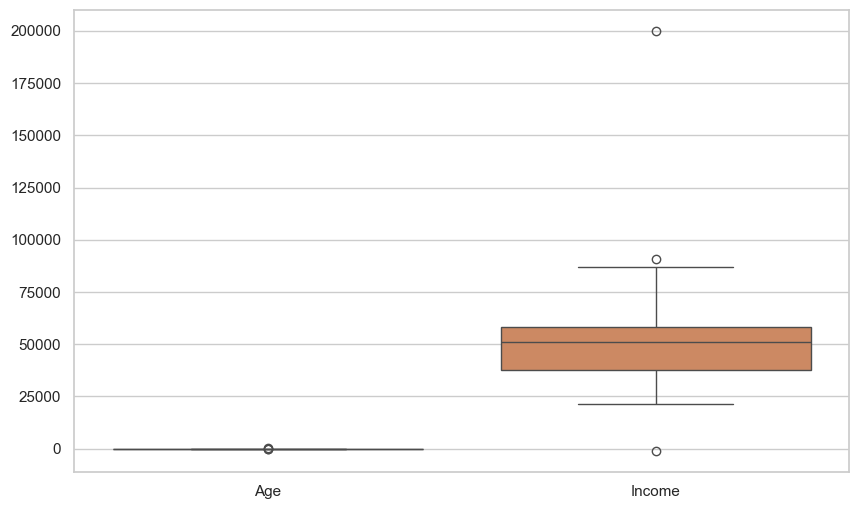

In [29]:
# 18. Boxplot para 'Age' y 'Income'
import seaborn as sns
sns.boxplot(data=df_clean[['Age', 'Income']])
plt.show()


In [30]:
# 19. Tratar outliers en 'Income' (Winsorization)
from scipy.stats.mstats import winsorize
df_clean['Income'] = winsorize(df_clean['Income'], limits=[0.05, 0.05])


In [31]:
# 20. Normalizar 'Income' (escala logarítmica)
import numpy as np
df_clean['Income_log'] = np.log1p(df_clean['Income'])

In [32]:
# 21. Binning para 'Age' (ej: rangos de edad)
bins = [0, 30, 40, 50, 100]
labels = ['<30', '30-40', '40-50', '50+']
df_clean['Age_group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels)

In [33]:
# 22. Verificar transformaciones
display(df_clean[['Age', 'Age_group', 'Income', 'Income_log']].head())

,Age,Age_group,Income,Income_log
0,34.967142,30-40,28769.438869,10.267104
1,28.617357,<30,43690.320159,10.684905
2,36.476885,30-40,44859.282252,10.711308
3,45.230299,40-50,37965.840962,10.544468
4,27.658466,<30,47580.714325,10.770204


In [34]:
# 23. Nueva feature: Income/Age ratio
df_clean['Income_Age_Ratio'] = df_clean['Income'] / df_clean['Age']

In [35]:
# 24. Extraer inicial de ciudad (ej: New York -> NY)
df_clean['City_initial'] = df_clean['City_New York'].apply(lambda x: 'NY' if x == 1 else 'OT')

In [36]:
# 25. Verificar nuevas features
display(df_clean[['Income_Age_Ratio', 'City_initial']].head())

,Income_Age_Ratio,City_initial
0,822.756382,NY
1,1526.707032,OT
2,1229.800236,OT
3,839.389572,OT
4,1720.294751,NY


In [37]:
# 26. Guardar dataset limpio
df_clean.to_csv('cleaned_data.csv', index=False)

In [38]:
# 27. Resumen final
print("Resumen:")
print(f"- Filas: {len(df_clean)}")
print(f"- Columnas: {df_clean.columns.tolist()}")

Resumen:
- Filas: 103
- Columnas: ['Age', 'Income', 'Registered', 'Gender_encoded', 'City_Berlin', 'City_Desconocido', 'City_New York', 'City_Paris', 'City_Tokyo', 'Income_log', 'Age_group', 'Income_Age_Ratio', 'City_initial']


#### Variable Tranformations


In [39]:
# 1. Normalizar 'Age' (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler_age = MinMaxScaler() # inicializar el escalador
df_clean['Age_normalized'] = scaler_age.fit_transform(df_clean[['Age']]) # aplicar la normalización
# Mostrar la comparación de 'Age' original y normalizado
print("Age (original vs normalized):")
display(df_clean[['Age', 'Age_normalized']].head())

Age (original vs normalized):


,Age,Age_normalized
0,34.967142,0.319737
1,28.617357,0.268939
2,36.476885,0.331815
3,45.230299,0.401842
4,27.658466,0.261268


In [40]:
# 2. Estandarizar 'Income' (Standard Scaling)
from sklearn.preprocessing import StandardScaler

scaler_income = StandardScaler()  # Inicializa el escalador
df_clean['Income_standardized'] = scaler_income.fit_transform(df_clean[['Income']])  # Transforma

# Mostrar la comparación de 'Income' original y estandarizado
print("\nIncome original vs estandarizado (estadísticas):")
display(df_clean[['Income', 'Income_standardized']].describe())



Income original vs estandarizado (estadísticas):


,Income,Income_standardized
count,103.000000,1.030000e+02
mean,50289.768964,3.970664e-16
std,13695.834720,1.004890e+00
min,28769.438869,-1.578988e+00
25%,37864.343344,-9.116776e-01
50%,51261.607549,7.130569e-02
75%,58315.989946,5.888994e-01
max,78292.788518,2.054636e+00


In [41]:
# 3. Log-transformar 'Income' para manejar la asimetría
import numpy as np

df_clean['Income_log'] = np.log1p(df_clean['Income'])  # log(1 + x) para evitar -inf
# Mostrar estadísticas de 'Income' log-transformado
print("\nIncome (log-transform):")
display(df_clean[['Income', 'Income_log']].describe())


Income (log-transform):


,Income,Income_log
count,103.000000,103.000000
mean,50289.768964,10.787377
std,13695.834720,0.281762
min,28769.438869,10.267104
25%,37864.343344,10.541788
50%,51261.607549,10.844717
75%,58315.989946,10.973614
max,78292.788518,11.268224


In [42]:
# 4. Binning de 'Age' (ejemplo: rangos de edad)
bins = [0, 30, 40, 50, 100]  # Límites de los rangos
labels = ['<30', '30-40', '40-50', '50+']  # Etiquetas para los rangos
df_clean['Age_binned'] = pd.cut(df_clean['Age'], bins=bins, labels=labels)  # Crear la columna de rangos de edad

# Mostrar la distribución de los rangos de edad:
print("\nDistribución de rangos de edad:")
print(df_clean['Age_binned'].value_counts())


Distribución de rangos de edad:
Age_binned
<30      55
30-40    35
40-50    11
50+       0
Name: count, dtype: int64


In [43]:
# 5. Categorización de 'Registered' (1.0 -> 'Yes', 0.0 -> 'No')
df_clean['Registered_category'] = df_clean['Registered'].map({1.0: 'Yes', 0.0: 'No'}) # Mapeo de valores a categorías

# Mostrar la distribución de la nueva categoría 'Registered':
print("\nRegistered (categorizado):")
print(df_clean['Registered_category'].value_counts())


Registered (categorizado):
Registered_category
No     52
Yes    51
Name: count, dtype: int64


In [44]:
# 6. Cuantiles de 'Income' (ejemplo: dividir en 4 cuantiles)
df_clean['Income_quantile'] = pd.qcut(df_clean['Income'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4']) # Dividir 'Income' en 4 cuantiles

# Mostrar la distribución de los cuantiles de 'Income':
print("\nCuantiles de Income:")
print(df_clean['Income_quantile'].value_counts())


Cuantiles de Income:
Income_quantile
Q1    26
Q2    26
Q4    26
Q3    25
Name: count, dtype: int64


C:\Users\braya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [45]:
# 7. Interacción entre 'Age' e 'Income'
df_clean['Age_Income_Interaction'] = df_clean['Age'] * df_clean['Income'] # Crear una nueva columna que sea el producto de 'Age' e 'Income'

# Mostrar ejemplos de la nueva interacción:
print("\nInteracción Age*Income (ejemplos):")
display(df_clean[['Age', 'Income', 'Age_Income_Interaction']].head())


Interacción Age*Income (ejemplos):


,Age,Income,Age_Income_Interaction
0,34.967142,28769.438869,1.005985e+06
1,28.617357,43690.320159,1.250301e+06
2,36.476885,44859.282252,1.636327e+06
3,45.230299,37965.840962,1.717206e+06
4,27.658466,47580.714325,1.316010e+06


In [46]:
# 8. Transformación de 'Age' (ejemplo: raíz cuadrada)
df_clean['Age_sqrt'] = np.sqrt(df_clean['Age']) # Aplicar la raíz cuadrada a 'Age' para reducir la asimetría

# Mostrar ejemplos de la transformación de 'Age':
print("\nAge vs sqrt(Age):")
display(df_clean[['Age', 'Age_sqrt']].head())


Age vs sqrt(Age):


C:\Users\braya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Age,Age_sqrt
0,34.967142,5.913302
1,28.617357,5.349519
2,36.476885,6.039610
3,45.230299,6.725347
4,27.658466,5.259132


In [47]:
# 9. Codificación por frecuencia de 'City' (ejemplo: Nueva York)
city_freq = df_clean['City_New York'].value_counts(normalize=True)  # Frecuencia de cada ciudad
df_clean['City_freq_encoded'] = df_clean['City_New York'].map(city_freq)  # mapear la frecuencia a una nueva columna

# Mostrar ejemplos de la codificación por frecuencia de 'City':
print("\nCodificación por frecuencia de 'City':")
display(df_clean[['City_New York', 'City_freq_encoded']].head())


Codificación por frecuencia de 'City':


,City_New York,City_freq_encoded
0,True,0.252427
1,False,0.747573
2,False,0.747573
3,False,0.747573
4,True,0.252427


In [48]:
# 10. Transformación Yeo-Johnson de 'Income' (para manejar asimetrías)
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # Inicializar el transformador Yeo-Johnson
df_clean['Income_yeojohnson'] = pt.fit_transform(df_clean[['Income']])  # Aplicar la transformación Yeo-Johnson a 'Income'

# Mostrar estadísticas de 'Income' transformado con Yeo-Johnson:
print("\nYeo-Johnson (Income):")
display(df_clean[['Income', 'Income_yeojohnson']].describe())


Yeo-Johnson (Income):


,Income,Income_yeojohnson
count,103.000000,1.030000e+02
mean,50289.768964,-2.864483e-16
std,13695.834720,1.004890e+00
min,28769.438869,-1.731124e+00
25%,37864.343344,-8.988226e-01
50%,51261.607549,1.459752e-01
75%,58315.989946,6.354451e-01
max,78292.788518,1.866020e+00


In [49]:
# 11. Guardar el dataset transformado
df_clean.to_csv('transformed_data.csv', index=False) # Guardar el dataset transformado en un nuevo archivo CSV
print("¡Dataset transformado guardado en 'transformed_data.csv'!")

¡Dataset transformado guardado en 'transformed_data.csv'!


#### Exportación de Datos Limpios